# Contents
## 0) Import Modules & Data
## 1) Data Preprocessing
## 2) Mind your Elbows
## 3) K-means Clustering
## 4) Check Statistics

# 0) Import Modules & Data

In [1]:
# Pandas import
 
import pandas as pd
import numpy as np
import os

# Graphs import
 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
%matplotlib inline

# Import scikit-learn & pylab for machine learning
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
import pylab as pl

In [2]:
df=pd.read_csv('/Users/sjpeterson76/Desktop/CareerFoundry/Data Immersion/Achievement 6/Seismic Data Project/02 Data/Prepared Data/reg_flag_derivation.csv')

# 1) Data Preprocessing

In [3]:
## Create subset barring categorical variables

df.columns # Get column names

Index(['Unnamed: 0', 'date', 'time', 'lat', 'long', 'type', 'depth', 'mag',
       'mag_type', 'rms', 'id', 'source', 'status', 'reg_flag'],
      dtype='object')

In [4]:
df=df[['lat','long','depth','mag']]

In [5]:
df

,lat,long,depth,mag
0,19.2460,145.6160,131.60,6.0
1,1.8630,127.3520,80.00,5.8
2,-20.5790,-173.9720,20.00,6.2
3,-59.0760,-23.5570,15.00,5.8
4,11.9380,126.4270,15.00,5.8
...,...,...,...,...
23394,-43.4810,-74.4771,14.93,5.6
23395,45.7192,26.5230,97.00,5.6
23396,36.9179,140.4262,10.00,5.9
23397,-9.0283,118.6639,79.00,6.3


# 2) Mind your Elbows

In [6]:
num_c1=range(1,10) # Define range of potential clusters in the data

In [7]:
# Define k-means cluster from range

kmeans=[KMeans(n_clusters=i) for i in num_c1]

In [8]:
# Apply k-means alogorithm

score=[kmeans[i].fit(df).score(df) for i in range (len(kmeans))]

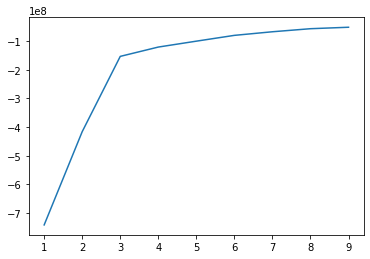

In [29]:
# Plot the elbow curve

elbow=pl.plot(num_c1,score)

!['Elbow'](elbow.png)

### We can break the model into 3 clusters!

# 3) K-means Clustering

In [10]:
kmeans=KMeans(n_clusters=3,n_jobs=-1) # Create k-means object

In [11]:
kmeans.fit(df) # Fit the kmeans object to the data

/Users/sjpeterson76/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=-1)

In [12]:
# Create a column in the df with values corresponding to each cluster

df['clusters']=kmeans.fit_predict(df)

/Users/sjpeterson76/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [13]:
df['clusters'].value_counts() # Check count of observations

0    14009
1     8069
2     1321
Name: clusters, dtype: int64

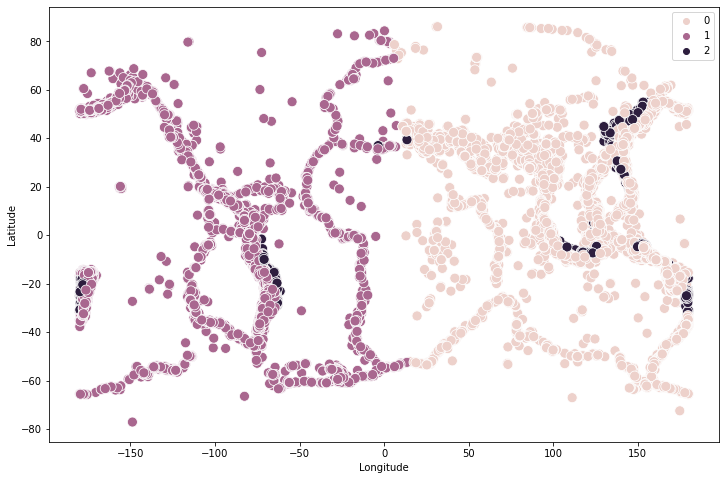

In [14]:
# Plot the clusters on 'long' & 'lat'

plt.figure(figsize=(12,8)) 
ax=sns.scatterplot(x=df['long'],
                  y=df['lat'],
                  hue=kmeans.labels_,
                  s=100)
ax.grid(False)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

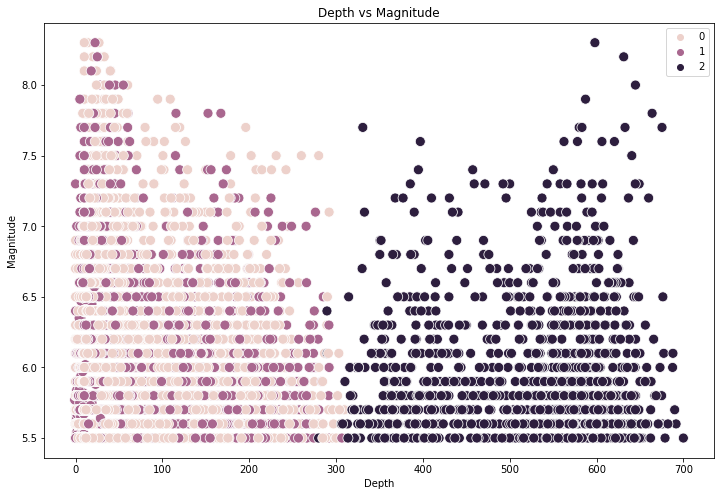

In [23]:
# Plot the clusters on 'depth' & 'mag'

plt.figure(figsize=(12,8)) 
ax=sns.scatterplot(x=df['depth'],
                  y=df['mag'],
                  hue=kmeans.labels_,
                  s=100)
ax.grid(False)
plt.xlabel('Depth')
plt.ylabel('Magnitude')
plt.title('Depth vs Magnitude')
plt.show()

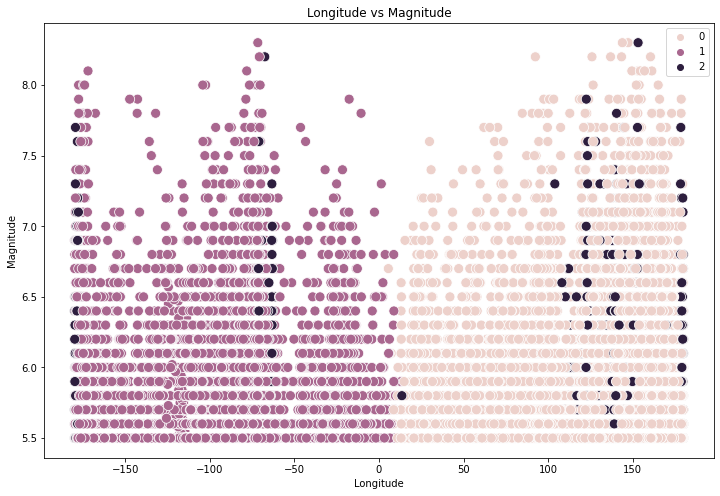

In [32]:
# Plot the clusters on 'long' & 'mag'

plt.figure(figsize=(12,8)) 
ax=sns.scatterplot(x=df['long'],
                  y=df['mag'],
                  hue=kmeans.labels_,
                  s=100)
plt.xlabel('Longitude')
plt.ylabel('Magnitude')
plt.title('Longitude vs Magnitude')
plt.show()

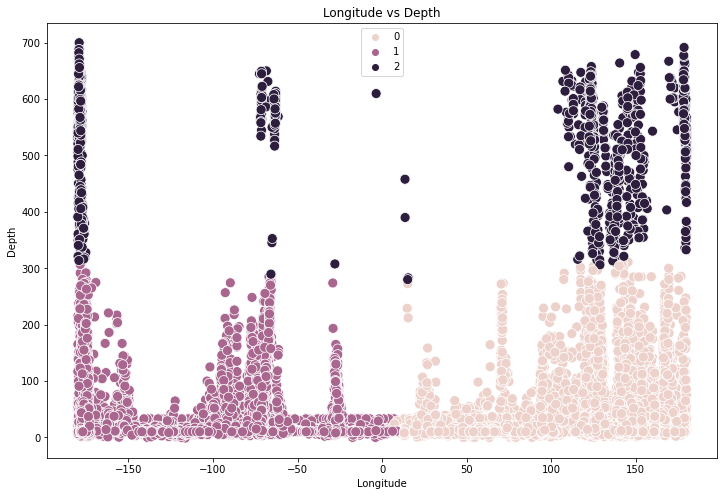

In [34]:
# Plot the clusters on 'long' & 'depth'

plt.figure(figsize=(12,8)) 
ax=sns.scatterplot(x=df['long'],
                  y=df['depth'],
                  hue=kmeans.labels_,
                  s=100)
plt.xlabel('Longitude')
plt.ylabel('Depth')
plt.title('Longitude vs Depth')
plt.show()

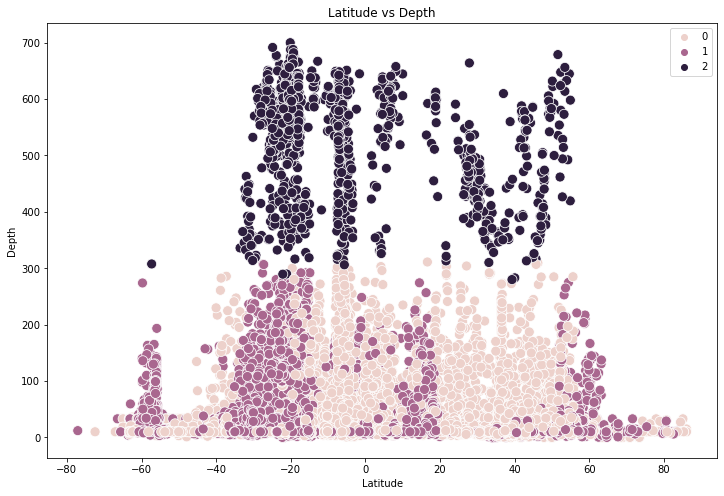

In [35]:
# Plot the clusters on 'lat' & 'depth'

plt.figure(figsize=(12,8)) 
ax=sns.scatterplot(x=df['lat'],
                  y=df['depth'],
                  hue=kmeans.labels_,
                  s=100)
plt.xlabel('Latitude')
plt.ylabel('Depth')
plt.title('Latitude vs Depth')
plt.show()

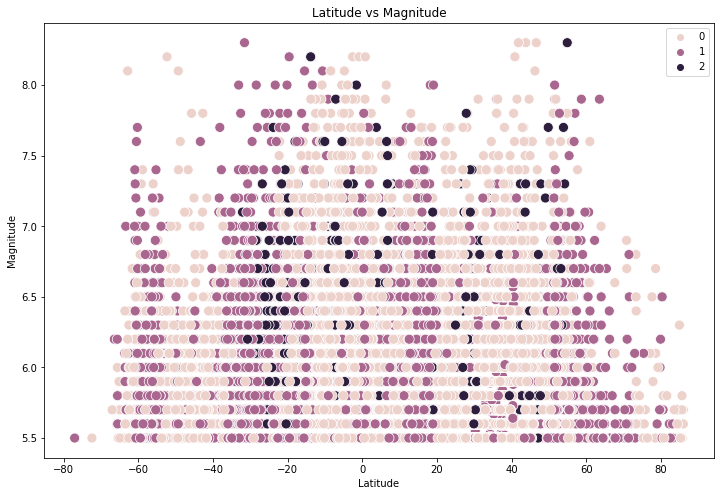

In [37]:
# Plot the clusters on 'lat' & 'mag'

plt.figure(figsize=(12,8)) 
ax=sns.scatterplot(x=df['lat'],
                  y=df['mag'],
                  hue=kmeans.labels_,
                  s=100)
plt.xlabel('Latitude')
plt.ylabel('Magnitude')
plt.title('Latitude vs Magnitude')
plt.show()

## Graphical Takeaways
### No significance in:
- Latitude vs Magnitude

### Significance in:
- Latitude vs Longitude + Longitude vs Magnitude
 - 'purple' is in the western hemisphere, 'pink' in the eastern
- Depth vs Magnitude + Longitude vs Depth + Latitude vs Depth
 - Before 300 m, color is a toss up between ‘pink’ and ‘purple’. After 300 m, its all ‘black’


# 4) Check Statistics

In [16]:
# Assign groups to colors

df.loc[df['clusters']==2,'cluster']='black'

In [17]:
df.loc[df['clusters']==1,'cluster']='purple'

In [18]:
df.loc[df['clusters']==0,'cluster']='pink'

In [19]:
df.columns

Index(['lat', 'long', 'depth', 'mag', 'clusters', 'cluster'], dtype='object')

In [20]:
df.head()

,lat,long,depth,mag,clusters,cluster
0,19.246,145.616,131.6,6.0,0,pink
1,1.863,127.352,80.0,5.8,0,pink
2,-20.579,-173.972,20.0,6.2,1,purple
3,-59.076,-23.557,15.0,5.8,1,purple
4,11.938,126.427,15.0,5.8,0,pink


In [24]:
# Get stats using .groupby()

df.groupby('cluster').agg({'lat':['mean','median'],
                          'long':['mean','median'],
                          'depth':['mean','median'],
                          'mag':['mean','median']})

lat                long                 depth              mag  \
             mean  median        mean    median        mean median      mean   
cluster                                                                        
black   -6.825373 -17.918   -8.895171   13.5205  528.837161  555.9  5.935428   
pink     8.230339   1.702  129.602636  140.2130   44.244136   33.0  5.887686   
purple  -8.329113 -16.660 -108.540664 -100.9723   41.905977   31.1  5.862202   

                
        median  
cluster         
black      5.8  
pink       5.8  
purple     5.7

## Statistical Takeaways
### No significance in:
- Magnitude

### Significance in:
- Depth:
 - 'black' is signicantly deeper that pink and purple
 
- Hemisphere:
 - 'purple' is generally located in the southwestern hemisphere
 - 'pink' is generally located in the northeastern hemisphere
 - 'black' is statistically nondescript in this regard
 
### May find use in unchecked categorical variables!
### What is significant about earthquake depth?
- It is important to note where the deepest earthquakes happen. Although deep earthquakes do not have large magnitudes (earthquakes at shallow depths tend to), deep tectonic shifts signal seismologists that there might be high-scale magnitude quakes later on at these same locations. They are referred to as "convergent plate boundaries."

 - "the deepest part of the subducting plate breaks into smaller pieces that become locked in place for long periods of time before suddenly moving to generate large earthquakes. Such earthquakes are often accompanied by uplift of the land by as much as a few meters."
 
 - [Source: USGS](https://pubs.usgs.gov/gip/dynamic/understanding.html)
 

In [40]:
# Bonus - add the 'cluster' variable to original df

cluster_var=pd.Series(df['cluster'])

In [45]:
# Import original df

cluster_df=pd.read_csv('/Users/sjpeterson76/Desktop/CareerFoundry/Data Immersion/Achievement 6/Seismic Data Project/02 Data/Prepared Data/reg_flag_derivation.csv')

In [46]:
# Add 'cluster' variable

cluster_df['clust_color']=cluster_var

In [48]:
# Export cluster_df

cluster_df.to_csv('/Users/sjpeterson76/Desktop/CareerFoundry/Data Immersion/Achievement 6/Seismic Data Project/02 Data/Prepared Data/cluster_df.csv')

In [49]:
cluster_df.columns

Index(['Unnamed: 0', 'date', 'time', 'lat', 'long', 'type', 'depth', 'mag',
       'mag_type', 'rms', 'id', 'source', 'status', 'reg_flag', 'clust_color'],
      dtype='object')

In [54]:
cluster_df['clust_color'].value_counts()

pink      14009
purple     8069
black      1321
Name: clust_color, dtype: int64

In [55]:
pin,pur,blk=cluster_df['clust_color'].value_counts()

In [57]:
## What percentage of each is there?
# Define total number of clusters

clust_total=pin+pur+blk

In [65]:
print(f'Percentage of pink clusters:\n{pin/clust_total:.2%}')
print(f'Percentage of purple clusters:\n{pur/clust_total:.2%}')
print(f'Percentage of black clusters:\n{blk/clust_total:.2%}')

Percentage of pink clusters:
59.87%
Percentage of purple clusters:
34.48%
Percentage of black clusters:
5.65%


In [51]:
## Inspect
# Create df for 'black' cluster

black_df=cluster_df.loc[cluster_df['clust_color']=='black']

In [52]:
black_df['source'].value_counts()

US           1192
ISCGEM        122
ISCGEMSUP       6
GCMT            1
Name: source, dtype: int64

In [53]:
# Export 'black_df' for Tableau

black_df.to_csv('/Users/sjpeterson76/Desktop/CareerFoundry/Data Immersion/Achievement 6/Seismic Data Project/02 Data/Prepared Data/2021-07-24 - black_df.csv')